In [2]:
# Assignment-4 (Celebal technologies) 
# (Data Science Intern) - Satvik
# I chose heart disease dataset because it fits perfectly with the assignment conditions of being a complex enough dataset that can be 
# used to do in-depth Exploratory data analysis(EDA).

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv('heart.csv')


#first of all we will take an overview of the data i.e.- size and all the names of the columns,datatypes used by them ,etc

print("🔹 Dataset Shape:", df.shape) 
print("\n🔹 Columns:\n", df.columns)
df.head()

🔹 Dataset Shape: (918, 12)

🔹 Columns:
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Summary Statistics:\n", df.describe(include='all'))


🔹 Data Types:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

🔹 Summary Statistics:
                Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      4

In [5]:
# Now we will check any missing values

print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Missing Value Percentages:\n", (df.isnull().sum()/len(df))*100)


🔹 Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

🔹 Missing Value Percentages:
 Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


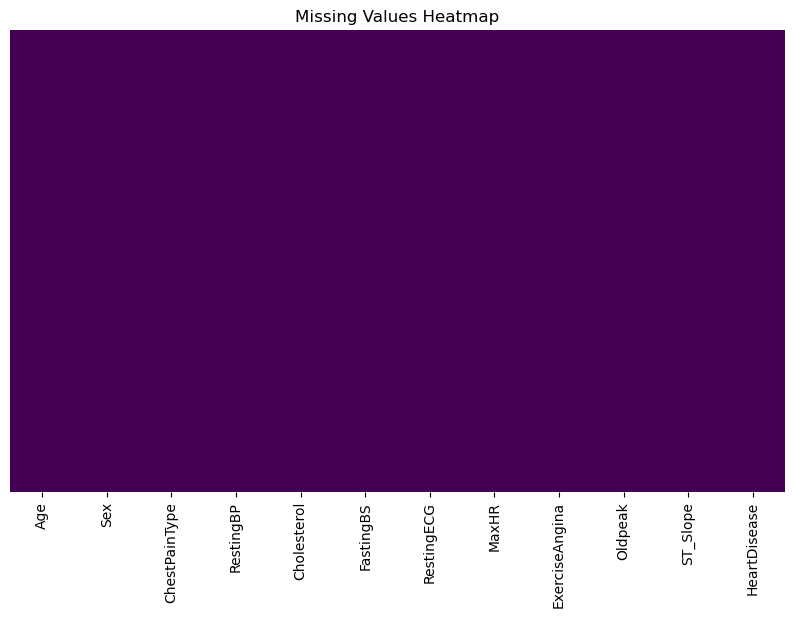

In [8]:

# Creating heatmap of the missing data

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()



In [ ]:
# This heatmap shows that there is no missing values present but in order to showcase how the handling of missing values is done
# we will be doing imputation process


In [12]:
df_imputed = df.copy()

numerical_cols = df_imputed.select_dtypes(include=np.number).columns
categorical_cols = df_imputed.select_dtypes(exclude=np.number).columns

imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df_imputed[numerical_cols] = imputer.fit_transform(df_imputed[numerical_cols])

for col in categorical_cols:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

print("\n Missing values after imputation:\n", df_imputed.isnull().sum())


 Missing values after imputation:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [13]:
#Since we already concluded from above heatmap that there are no missing values present,if there were any then imputation would have solved it anyways.

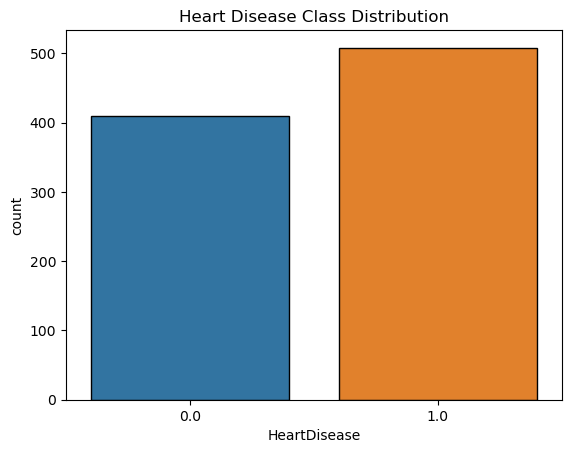

In [29]:
sns.countplot(data=df_imputed, x='HeartDisease', hue='HeartDisease', edgecolor='black', legend=False)
plt.title("Heart Disease Class Distribution")
plt.show()


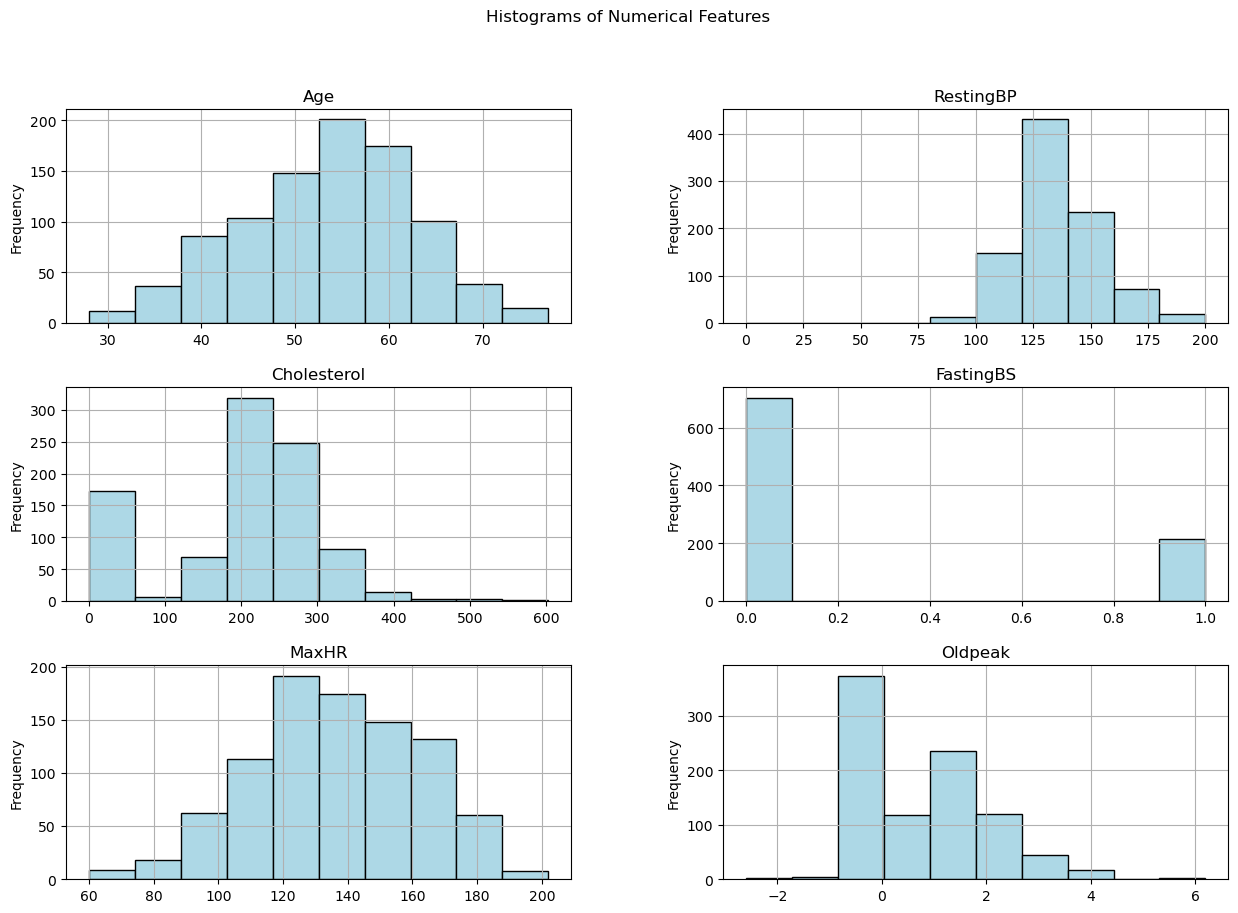

In [39]:
num_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns.drop('HeartDisease')

df_imputed[num_cols].hist(figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")

#using for loop to add labels in y-axis for better visualisation of data.
for ax in plt.gcf().get_axes():
    ax.set_ylabel("Frequency")

plt.show()

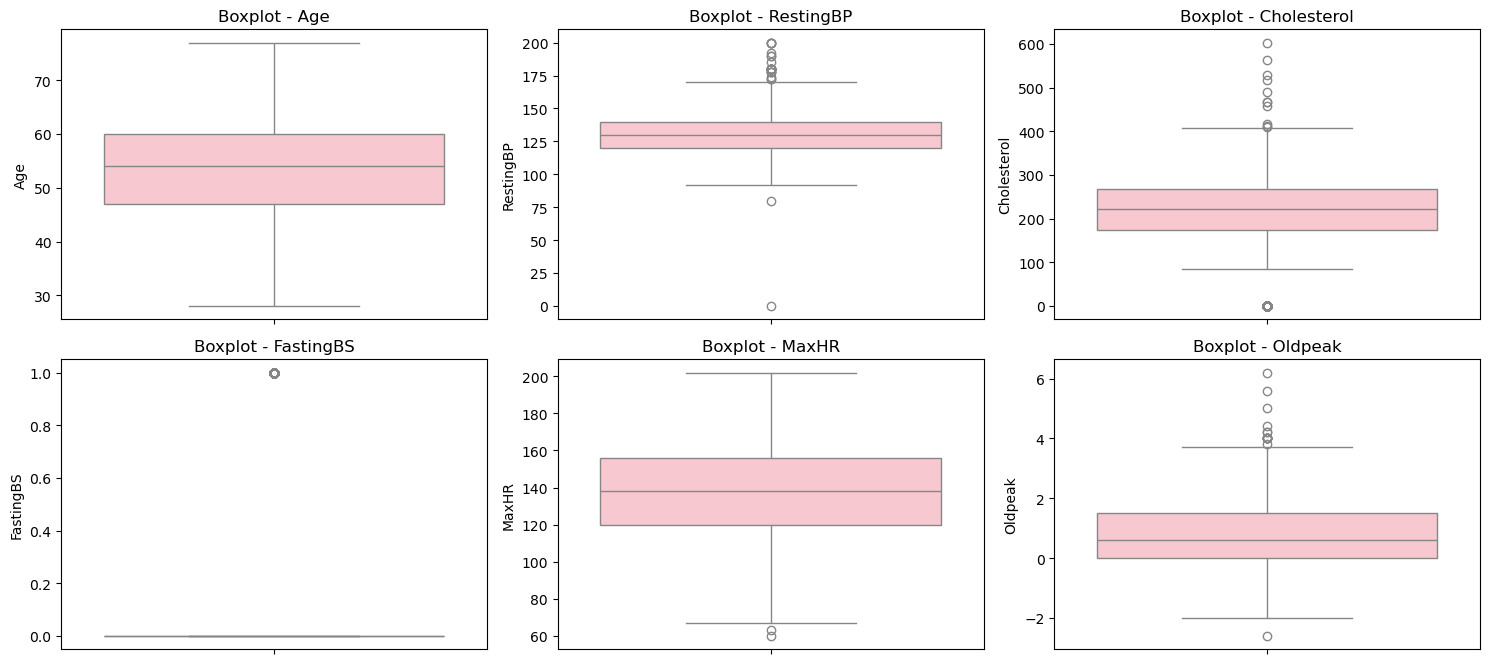

In [55]:
# Using boxplot for outlier detection

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=col, data=df_imputed, color='pink')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

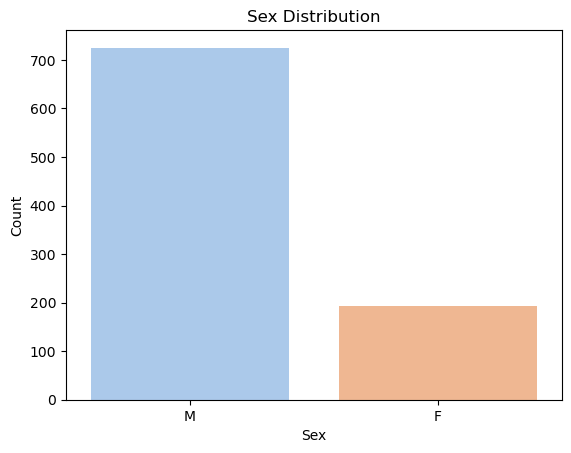

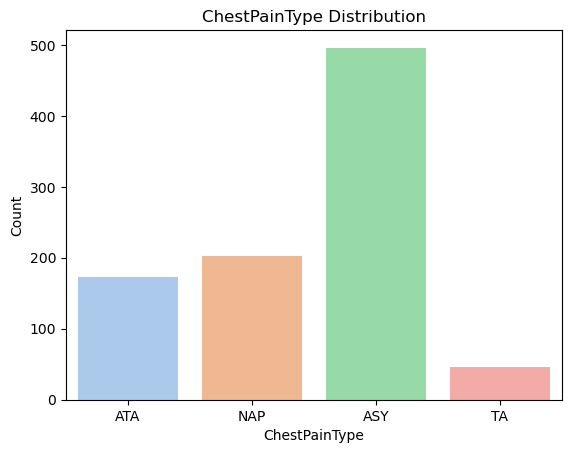

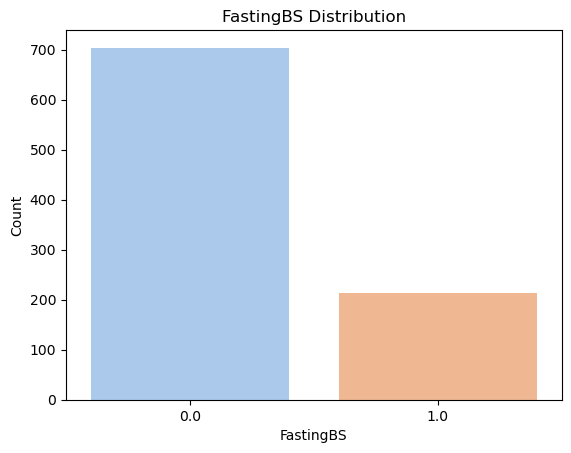

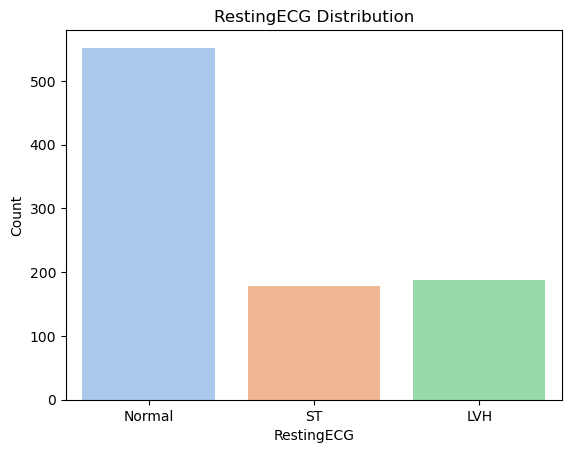

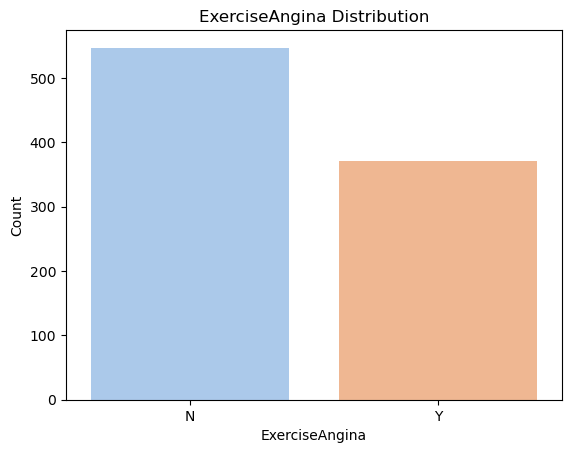

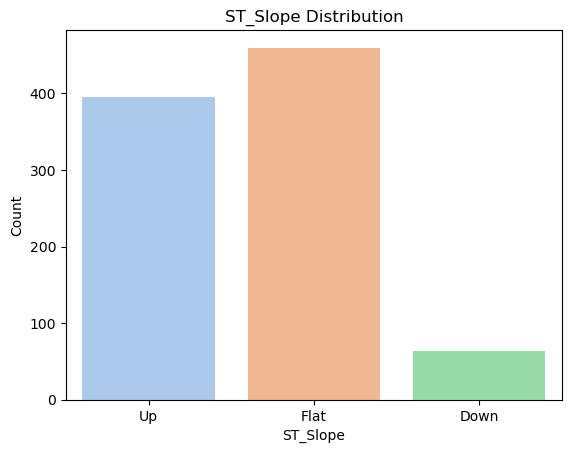

In [68]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in cat_features:
    sns.countplot(x=feature, hue=feature, data=df_imputed, palette='pastel', legend=False)
    plt.title(f'{feature} Distribution')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.show()


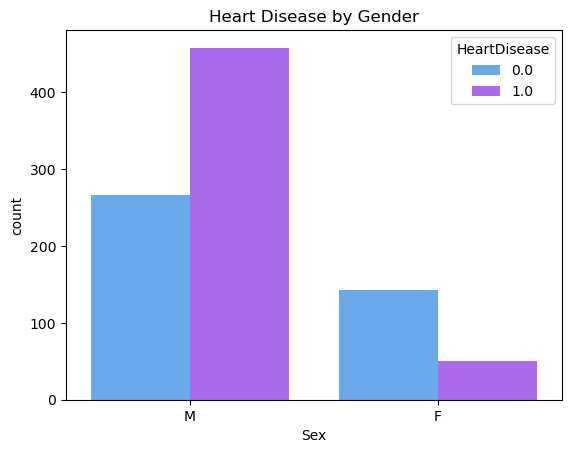

In [71]:
# Heart disease on the basis of gender

sns.countplot(x='Sex', hue='HeartDisease', data=df_imputed, palette='cool')
plt.title("Heart Disease by Gender")
plt.show()


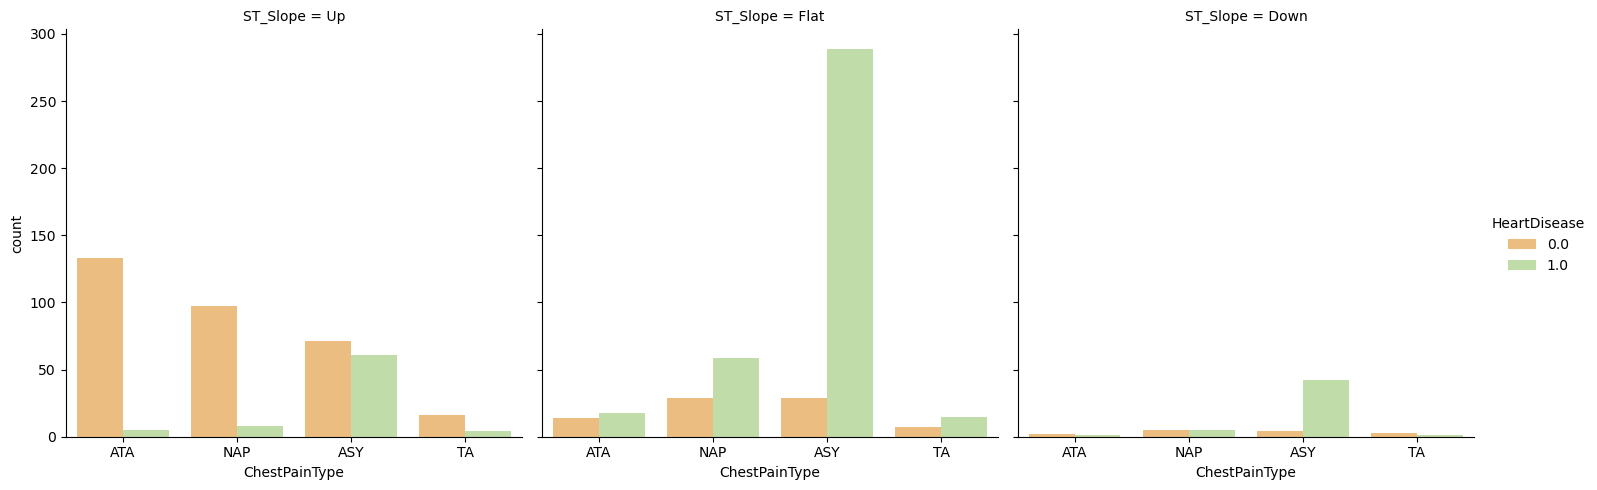

In [72]:
# Heart disease by  ChestPainType and ST_slope (multivariable analysis)

sns.catplot(x='ChestPainType', hue='HeartDisease', kind='count', col='ST_Slope', data=df_imputed, palette='Spectral')
plt.show()


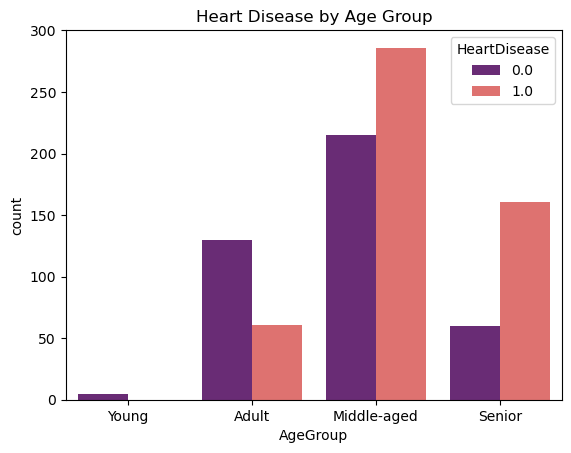

In [77]:
# In order to simplify analysis and better visualisation of data we divide people with different age into four group i.e.-
# 'Young', 'Adult', 'Middle-aged', 'Senior'.

bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df_imputed['AgeGroup'] = pd.cut(df_imputed['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeGroup', hue='HeartDisease', data=df_imputed, palette='magma')
plt.title("Heart Disease by Age Group")
plt.show()

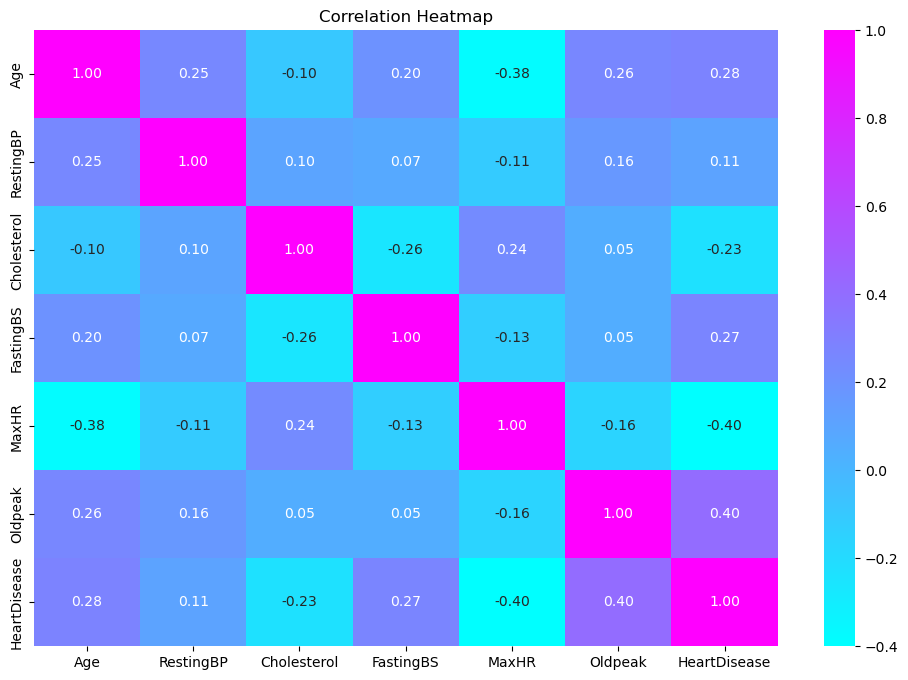

In [86]:

# Correlation Heatmap 
# (only for numeric features)

plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='cool', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


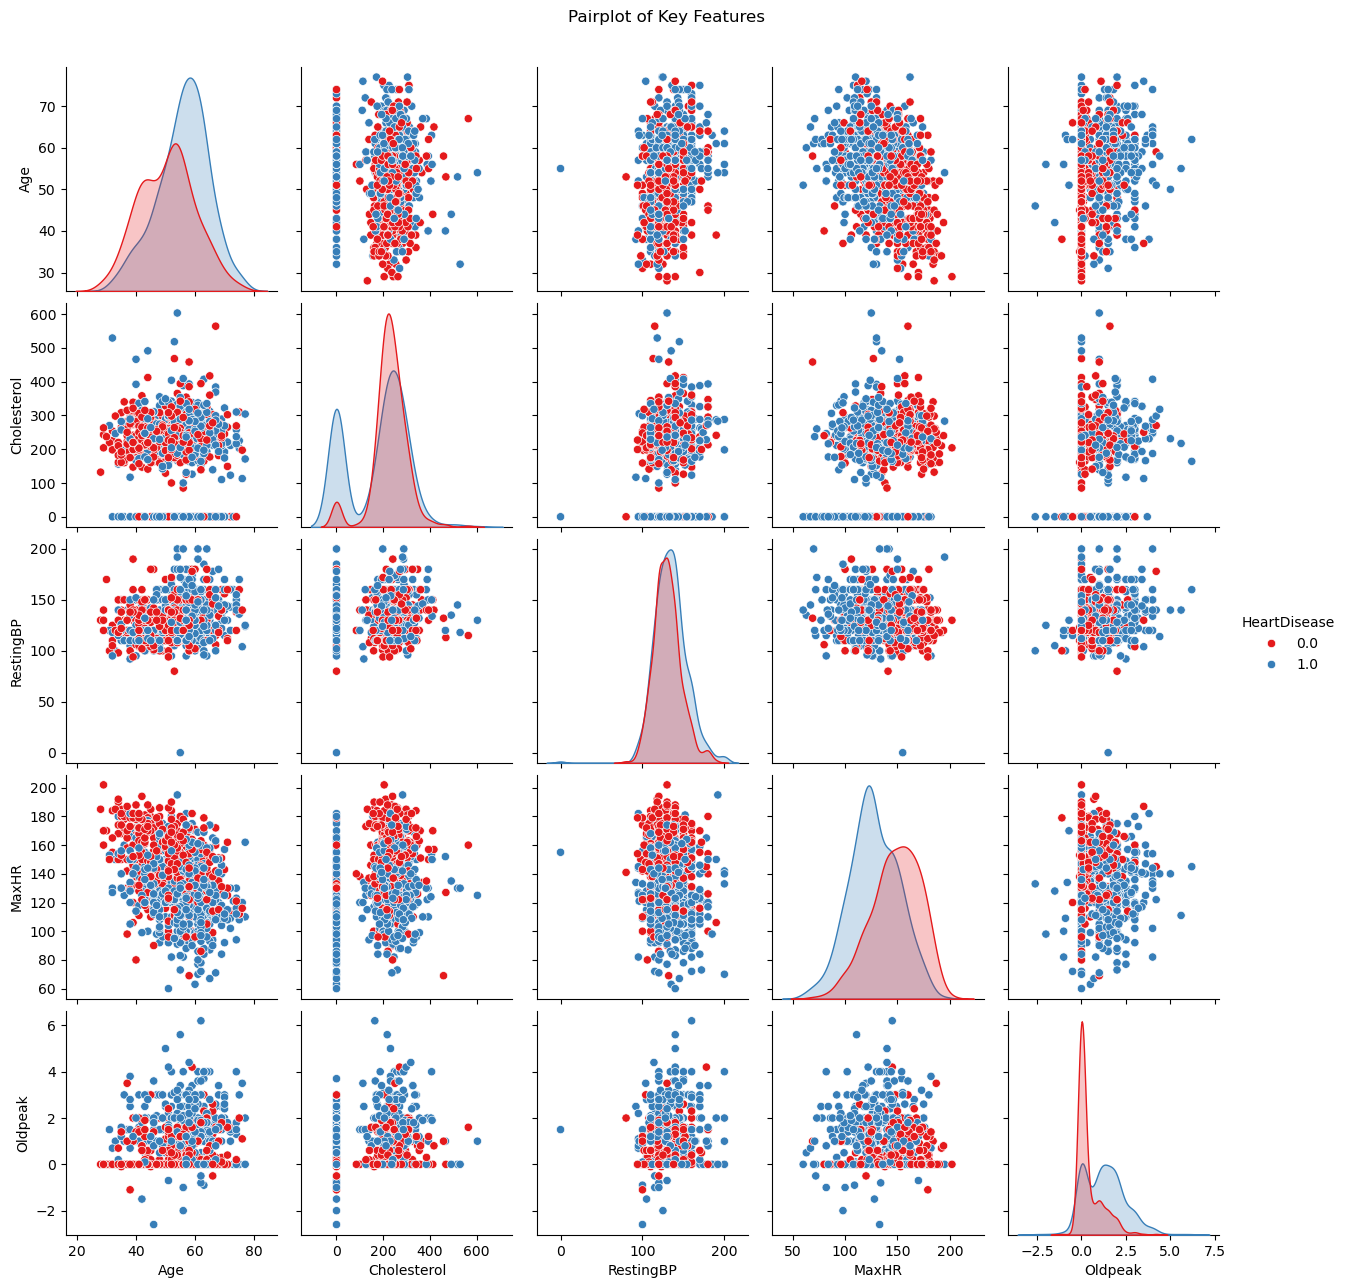

In [94]:
# Making pairplot for key features
# Visualizing pairwise relationships between key features to detect patterns and correlations based on Heart Disease


key_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak', 'HeartDisease']
sns.pairplot(df_imputed[key_features], hue='HeartDisease', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


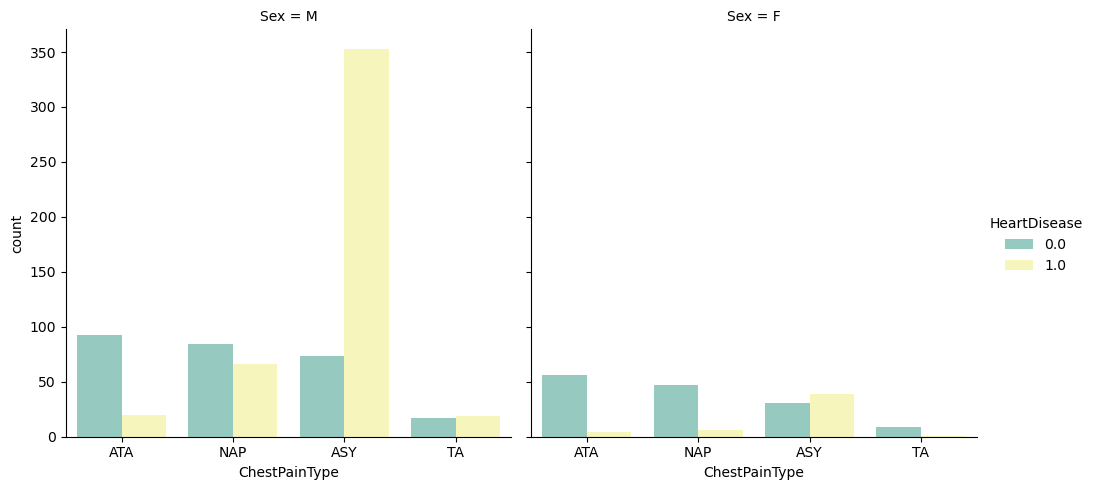

In [95]:
# MULTIVARIABLE ANALYSIS (ChestPainType and Sex)
# Chest Pain Type is very important feature of this dataset and can vary by gender,
# so we analyze how it relates to heart disease separately for males and females.


sns.catplot(x='ChestPainType', hue='HeartDisease', col='Sex', kind='count', data=df_imputed, palette='Set3')
plt.show()

In [ ]:
# CONCLUSION - 
# This Exploratory Data Analysis (EDA) helped uncover patterns and relationships in the heart disease dataset.
# We explored data distribution, handled missing values, analyzed key features, and visualized multivariable interactions.
# Chest pain type, age group, cholesterol, and ST slope showed significant influence on heart disease presence.
# These insights can guide further predictive modeling and healthcare decision-making.
